In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
def cargadata(ruta):
    #descarga de datos y limpieza
    df = pd.read_csv(ruta)
    
    
    
    return df

In [3]:
df = cargadata('C:\\Users\\x\\OneDrive\\Escritorio\\Agus\\Henry DATA 02\\emissionsmap\\SubirData\\Normalizados\\Normal_primary-sub-energy-source.csv')

In [4]:
df.head(10)

,País,Código,Año,Consumo Eólico - Twh,Consumo Hidroeléctrico - Twh,Consumo Solar - Twh,Consumo Nuclear - Twh,Consumo De Biocombustibles - Twh - Total,Geo Biomasa Otros - Twh,Consumo De Carbón - Twh,Consumo De Aceite - Twh,Consumo De Gas - Twh,Id_País,Id_Año
0,Africa,NaN,1965,0.0,41.118813,NaN,0.0,NaN,NaN,323.496124,341.262756,9.543755,f5cd262901883dff68d06b215fb0f28e,d46e1fcf4c07ce4a69ee07e4134bcef1
1,Africa,NaN,1966,0.0,45.862915,NaN,0.0,NaN,NaN,323.122192,369.486572,10.669916,f5cd262901883dff68d06b215fb0f28e,3683af9d6f6c06acee72992f2977f67e
2,Africa,NaN,1967,0.0,47.875538,NaN,0.0,NaN,NaN,330.291565,368.125244,10.545670,f5cd262901883dff68d06b215fb0f28e,a82d922b133be19c1171534e6594f754
3,Africa,NaN,1968,0.0,56.000469,NaN,0.0,NaN,NaN,343.512909,389.199860,10.688970,f5cd262901883dff68d06b215fb0f28e,98c7242894844ecd6ec94af67ac8247d
4,Africa,NaN,1969,0.0,65.352089,NaN,0.0,NaN,NaN,346.642944,396.922852,12.492000,f5cd262901883dff68d06b215fb0f28e,4d8556695c262ab91ff51a943fdd6058
5,Africa,NaN,1970,0.0,81.702881,NaN,0.0,NaN,NaN,360.756897,433.772308,15.520325,f5cd262901883dff68d06b215fb0f28e,0004d0b59e19461ff126e3a08a814c33
6,Africa,NaN,1971,0.0,76.921318,0.0,0.0,NaN,0.164,383.012329,473.565430,18.405264,f5cd262901883dff68d06b215fb0f28e,de73998802680548b916f1947ffbad76
7,Africa,NaN,1972,0.0,87.625046,0.0,0.0,NaN,0.165,384.210815,510.672638,24.670656,f5cd262901883dff68d06b215fb0f28e,c4de8ced6214345614d33fb0b16a8acd
8,Africa,NaN,1973,0.0,92.688919,0.0,0.0,NaN,0.170,408.910339,549.719788,39.551792,f5cd262901883dff68d06b215fb0f28e,deb54ffb41e085fd7f69a75b6359c989
9,Africa,NaN,1974,0.0,105.467155,0.0,0.0,NaN,0.175,425.646210,567.799683,44.518486,f5cd262901883dff68d06b215fb0f28e,3d863b367aa379f71c7afc0c9cdca41d


In [5]:
# Número de valores únicos en cada variable
for var in df:
    print(f'{var}: {df[var].nunique()}')

País: 114
Código: 81
Año: 57
Consumo Eólico - Twh: 2321
Consumo Hidroeléctrico - Twh: 5311
Consumo Solar - Twh: 2032
Consumo Nuclear - Twh: 2206
Consumo De Biocombustibles - Twh - Total: 955
Geo Biomasa Otros - Twh: 3225
Consumo De Carbón - Twh: 5480
Consumo De Aceite - Twh: 6092
Consumo De Gas - Twh: 5394
Id_País: 114
Id_Año: 57


In [6]:
print('Numero de duplicados: {}'.format(len(df[df.duplicated()])))

Numero de duplicados: 0


#### Valores faltantes

In [7]:
for var in df:
    print(f'{var}: {df[var].isnull().sum()}')

País: 0
Código: 1861
Año: 0
Consumo Eólico - Twh: 221
Consumo Hidroeléctrico - Twh: 7
Consumo Solar - Twh: 236
Consumo Nuclear - Twh: 536
Consumo De Biocombustibles - Twh - Total: 4576
Geo Biomasa Otros - Twh: 212
Consumo De Carbón - Twh: 26
Consumo De Aceite - Twh: 0
Consumo De Gas - Twh: 66
Id_País: 0
Id_Año: 0


In [8]:
def calidaDato (data):
    df = data
    calidad = []
    mascara = df.isna().sum()
    for i in range(0,len(mascara)):
        p = (df.shape[0]- mascara[i]) / df.shape[0]
        calidad.append([mascara.index[i], round((p*100),2)])
   
    calidad = pd.DataFrame(calidad)
    calidad.rename(columns={0:'Columna', 1: 'Calida %'}, inplace=True)
    
    return calidad

In [9]:
dataprueba = calidaDato(df)

In [10]:
import missingno as msno


,Columna,Calida %
0,País,100.00
1,Código,69.79
2,Año,100.00
3,Consumo Eólico - Twh,96.41
4,Consumo Hidroeléctrico - Twh,99.89
5,Consumo Solar - Twh,96.17
6,Consumo Nuclear - Twh,91.30
7,Consumo De Biocombustibles - Twh - Total,25.71
8,Geo Biomasa Otros - Twh,96.56
9,Consumo De Carbón - Twh,99.58


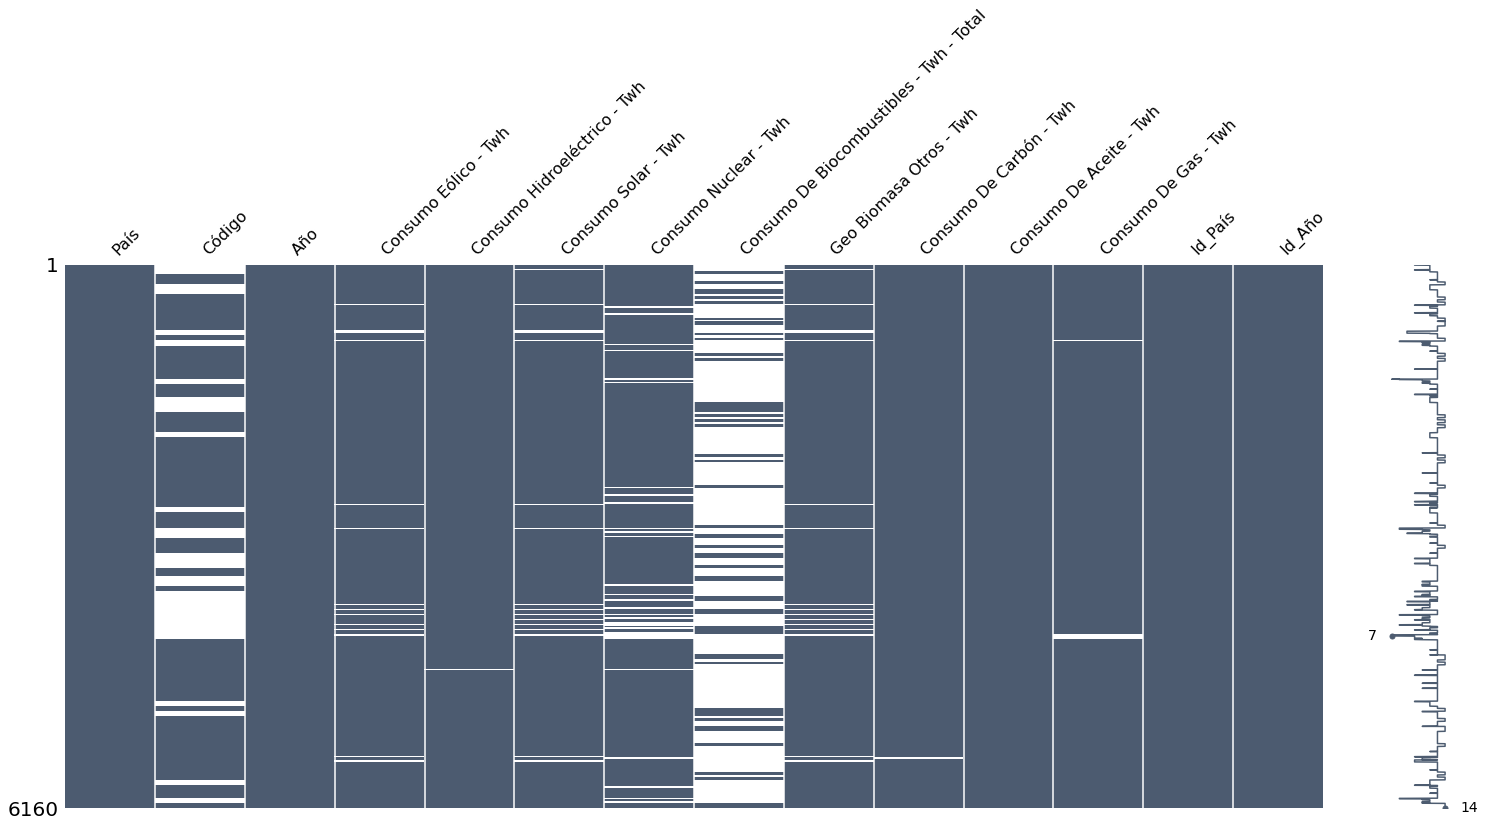

In [11]:
msno.matrix(df,color=(0.3,0.36,0.44))
dataprueba

In [13]:
mundo = df[df['Código']=='OWID_WRL']

In [14]:
df.columns

Index(['País', 'Código', 'Año', 'Consumo Eólico - Twh',
       'Consumo Hidroeléctrico - Twh', 'Consumo Solar - Twh',
       'Consumo Nuclear - Twh', 'Consumo De Biocombustibles - Twh - Total',
       'Geo Biomasa Otros - Twh', 'Consumo De Carbón - Twh',
       'Consumo De Aceite - Twh', 'Consumo De Gas - Twh', 'Id_País', 'Id_Año'],
      dtype='object')

In [15]:
fig1 = px.line(mundo, x='Año', y='Consumo Nuclear - Twh', color="Código",title='Consumo de Nuclear Consumption - TWh ')
fig1.show()

In [8]:
fig1 = px.line(mundo, x='Año', y="Consumo Eólico - Twh", color="Código",title='Consumo Eólico - Twh')
fig1.show()

In [16]:
paises = df[df['Código']!='OWID_WRL']

In [12]:
paises

,País,Código,Año,Consumo Eólico - Twh,Consumo Hidroeléctrico - Twh,Consumo Solar - Twh,Consumo Nuclear - Twh,Consumo De Biocombustibles - Twh - Total,Geo Biomasa Otros - Twh,Consumo De Carbón - Twh,Consumo De Aceite - Twh,Consumo De Gas - Twh,Id_País,Id_Año
0,Africa,NaN,1965,0.000000,41.118813,NaN,0.0,NaN,NaN,323.496124,341.262756,9.543755,f5cd262901883dff68d06b215fb0f28e,d46e1fcf4c07ce4a69ee07e4134bcef1
1,Africa,NaN,1966,0.000000,45.862915,NaN,0.0,NaN,NaN,323.122192,369.486572,10.669916,f5cd262901883dff68d06b215fb0f28e,3683af9d6f6c06acee72992f2977f67e
2,Africa,NaN,1967,0.000000,47.875538,NaN,0.0,NaN,NaN,330.291565,368.125244,10.545670,f5cd262901883dff68d06b215fb0f28e,a82d922b133be19c1171534e6594f754
3,Africa,NaN,1968,0.000000,56.000469,NaN,0.0,NaN,NaN,343.512909,389.199860,10.688970,f5cd262901883dff68d06b215fb0f28e,98c7242894844ecd6ec94af67ac8247d
4,Africa,NaN,1969,0.000000,65.352089,NaN,0.0,NaN,NaN,346.642944,396.922852,12.492000,f5cd262901883dff68d06b215fb0f28e,4d8556695c262ab91ff51a943fdd6058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6098,Western Africa (BP),NaN,2017,0.472493,49.798744,0.859688,NaN,NaN,0.316682,7.843330,377.442932,220.183716,6ba9e30f9bda4207411a25e5d413d4db,8d8818c8e140c64c743113f563cf750f
6099,Western Africa (BP),NaN,2018,0.502948,52.793194,1.675828,NaN,NaN,0.216594,9.002492,434.532440,235.207291,6ba9e30f9bda4207411a25e5d413d4db,84ddfb34126fc3a48ee38d7044e87276
6100,Western Africa (BP),NaN,2019,0.606558,59.361206,2.101726,NaN,NaN,0.251494,8.791768,442.070068,241.824905,6ba9e30f9bda4207411a25e5d413d4db,ea6b2efbdd4255a9f1b3bbc6399b58f4
6101,Western Africa (BP),NaN,2020,1.089399,58.433865,2.176087,NaN,NaN,0.247744,7.973295,436.522675,258.820496,6ba9e30f9bda4207411a25e5d413d4db,7b7a53e239400a13bd6be6c91c4f6c4e


In [11]:
fig1 = px.line(paises, x='Año', y="Consumo Eólico - Twh", color="Código",title='Consumo de Consumo Eólico - Twh')
fig1.show()

In [17]:
paises.head(5)

,País,Código,Año,Consumo Eólico - Twh,Consumo Hidroeléctrico - Twh,Consumo Solar - Twh,Consumo Nuclear - Twh,Consumo De Biocombustibles - Twh - Total,Geo Biomasa Otros - Twh,Consumo De Carbón - Twh,Consumo De Aceite - Twh,Consumo De Gas - Twh,Id_País,Id_Año
0,Africa,NaN,1965,0.0,41.118813,NaN,0.0,NaN,NaN,323.496124,341.262756,9.543755,f5cd262901883dff68d06b215fb0f28e,d46e1fcf4c07ce4a69ee07e4134bcef1
1,Africa,NaN,1966,0.0,45.862915,NaN,0.0,NaN,NaN,323.122192,369.486572,10.669916,f5cd262901883dff68d06b215fb0f28e,3683af9d6f6c06acee72992f2977f67e
2,Africa,NaN,1967,0.0,47.875538,NaN,0.0,NaN,NaN,330.291565,368.125244,10.545670,f5cd262901883dff68d06b215fb0f28e,a82d922b133be19c1171534e6594f754
3,Africa,NaN,1968,0.0,56.000469,NaN,0.0,NaN,NaN,343.512909,389.199860,10.688970,f5cd262901883dff68d06b215fb0f28e,98c7242894844ecd6ec94af67ac8247d
4,Africa,NaN,1969,0.0,65.352089,NaN,0.0,NaN,NaN,346.642944,396.922852,12.492000,f5cd262901883dff68d06b215fb0f28e,4d8556695c262ab91ff51a943fdd6058


In [5]:
pais_df = df[(df['Código'].isna() != True) & (df['País'] != 'World')]

In [18]:
col = ['Consumo De Carbón - Twh', 'Consumo Hidroeléctrico - Twh','Consumo Solar - Twh','Consumo De Aceite - Twh']
año = pais_df.groupby('Año')[col].sum()

In [19]:
año.head(5)

,Consumo De Carbón - Twh,Consumo Hidroeléctrico - Twh,Consumo Solar - Twh,Consumo De Aceite - Twh
Año,,,,
1965,15878.753714,2631.256164,0.0,17387.889353
1966,16052.457948,2798.330929,0.0,18712.938782
1967,15791.795473,2857.294634,0.0,20069.140028
1968,16014.774814,3006.682551,0.0,21794.409607
1969,16502.153574,3174.751514,0.0,23623.338542


In [20]:
import plotly.offline as py
py.iplot([{
    'x':año.index,
    'y':año[col],
    'name': col
} for col in  año.columns], filename='cufflinks/multiple-lines-on-same-chart')

In [23]:
pais_df.describe()

,Año,Consumo Eólico - Twh,Consumo Hidroeléctrico - Twh,Consumo Solar - Twh,Consumo Nuclear - Twh,Consumo De Biocombustibles - Twh - Total,Geo Biomasa Otros - Twh,Consumo De Carbón - Twh,Consumo De Aceite - Twh,Consumo De Gas - Twh
count,4242.000000,4173.000000,4235.000000,4173.000000,4078.000000,838.000000,4173.000000,4216.000000,4242.000000,4239.000000
mean,1994.103960,8.295721,86.147112,3.007652,65.968179,17.502964,2.754773,379.976471,503.181342,283.403810
std,16.243789,59.542268,234.886780,26.527422,238.228705,53.256104,9.494644,1605.206658,1249.792209,827.562050
min,1965.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097381,0.000000
25%,1980.000000,0.000000,1.182796,0.000000,0.000000,0.000000,0.000000,3.186052,63.818525,8.662250
50%,1995.000000,0.000000,12.929382,0.000000,0.000000,1.726675,0.038000,31.267638,141.199387,52.024929
75%,2008.000000,0.178049,62.029079,0.014778,23.451892,11.133835,1.210555,150.560738,391.439224,218.406921
max,2021.000000,1715.493408,3471.190186,855.653381,2303.296387,415.870148,169.931580,23936.060547,11214.078125,8506.916992


In [17]:
pais_df = df[(df['Código'].isna() != True) & (df['País'] != 'World')]

In [18]:
temp_gc = pais_df[['País', 'Año', 'Consumo Eólico - Twh']].groupby(['País','Año']).sum().reset_index()

px.choropleth(data_frame=temp_gc, locations="País", locationmode='country names', animation_frame="Año",
              color='Consumo Eólico - Twh', title="Consumo Eólico - Twh")

In [21]:
from raceplotly.plots import barplot

In [22]:
my_raceplot = barplot(pais_df,  item_column='País', value_column='Consumo Eólico - Twh', time_column='Año',top_entries=10)
fig=my_raceplot.plot(item_label = 'Top 10 Paises', value_label = 'Consumo Eólico - Twh', frame_duration = 200, date_format='%Y',orientation='horizontal')

#Add chart title, format the chart, etc.
fig.update_layout(
      title='Top 10 Paises en Consumo Eólico - Twh',
      title_x=0.15,
      width=800,
      height=550,
      paper_bgcolor="snow",
      )

C:\Users\x\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\raceplotly\plots.py:295: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
pais_df

,País,Código,Año,Consumo Eólico - Twh,Consumo Hidroeléctrico - Twh,Consumo Solar - Twh,Consumo Nuclear - Twh,Consumo De Biocombustibles - Twh - Total,Geo Biomasa Otros - Twh,Consumo De Carbón - Twh,Consumo De Aceite - Twh,Consumo De Gas - Twh,Id_País,Id_Año
114,Algeria,DZA,1965,0.000000,1.182796,0.000000,0.0,NaN,0.000000,0.814100,15.405252,7.430500,575b9408b6daa2ddcefbcf6d81c9b4c9,d46e1fcf4c07ce4a69ee07e4134bcef1
115,Algeria,DZA,1966,0.000000,1.049731,0.000000,0.0,NaN,0.000000,0.790840,20.272705,7.719250,575b9408b6daa2ddcefbcf6d81c9b4c9,3683af9d6f6c06acee72992f2977f67e
116,Algeria,DZA,1967,0.000000,1.212366,0.000000,0.0,NaN,0.000000,0.604760,18.942032,7.488250,575b9408b6daa2ddcefbcf6d81c9b4c9,a82d922b133be19c1171534e6594f754
117,Algeria,DZA,1968,0.000000,1.664785,0.000000,0.0,NaN,0.000000,0.639650,20.167301,7.873250,575b9408b6daa2ddcefbcf6d81c9b4c9,98c7242894844ecd6ec94af67ac8247d
118,Algeria,DZA,1969,0.000000,1.067473,0.000000,0.0,NaN,0.000000,0.814100,21.305929,10.351687,575b9408b6daa2ddcefbcf6d81c9b4c9,4d8556695c262ab91ff51a943fdd6058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6041,Vietnam,VNM,2017,0.931452,233.126373,0.021278,0.0,NaN,0.076454,329.915192,308.498444,95.206902,fdef6daa799e80dbce1b561577b21181,8d8818c8e140c64c743113f563cf750f
6042,Vietnam,VNM,2018,1.288469,223.534851,0.277780,0.0,NaN,0.126210,439.513977,324.533234,96.596497,fdef6daa799e80dbce1b561577b21181,84ddfb34126fc3a48ee38d7044e87276
6043,Vietnam,VNM,2019,1.903172,175.402878,13.843574,0.0,NaN,0.126210,580.663818,334.758331,98.430000,fdef6daa799e80dbce1b561577b21181,ea6b2efbdd4255a9f1b3bbc6399b58f4
6044,Vietnam,VNM,2020,2.820083,192.722351,28.521502,0.0,NaN,0.126210,583.207520,276.899048,88.393997,fdef6daa799e80dbce1b561577b21181,7b7a53e239400a13bd6be6c91c4f6c4e


In [23]:
my_raceplot = barplot(pais_df,  item_column='País', value_column='Consumo Hidroeléctrico - Twh', time_column='Año',top_entries=10)
fig=my_raceplot.plot(item_label = 'Top 10 Paises', value_label = 'Consumo Hidroeléctrico - Twh', frame_duration = 800, date_format='%Y',orientation='horizontal')

#Add chart title, format the chart, etc.
fig.update_layout(
      title='Top 10 Paises en Consumo Hidroeléctrico - Twh',
      title_x=0.15,
      width=800,
      height=550,
      paper_bgcolor="snow",
      )

C:\Users\x\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\raceplotly\plots.py:295: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
my_raceplot = barplot(pais_df,  item_column='País', value_column='Consumo Solar - Twh', time_column='Año',top_entries=10)
fig=my_raceplot.plot(item_label = 'Top 10 Paises', value_label = 'Consumo Solar - Twh', frame_duration = 800, date_format='%Y',orientation='horizontal')

#Add chart title, format the chart, etc.
fig.update_layout(
      title='Top 10 Paises en Consumo Solar - Twh',
      title_x=0.15,
      width=800,
      height=550,
      paper_bgcolor="snow",
      )

C:\Users\x\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\raceplotly\plots.py:295: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def linealPlot(df_new):
    fig= go.Figure(data=[
        go.Bar(
        x=df_new.País,
        y=df_new["Renovables (% Energía Primaria Equivalente)"],
        name='dif 2'
        )
    ])
    fig.update_layout(
        height=300, width=1000,
        plot_bgcolor='black',
        paper_bgcolor= 'black',
        font_color='#cee3e1',
        legend=dict(
            x=0.05,
            y=1,
            title_font_family="Times New Roman",
            font=dict(
                family="Courier",
                size=12,
color="LightSteelBlue"
            ),
            bgcolor="Black",
            bordercolor="LightSteelBlue",
            borderwidth=1
        ),
        xaxis=dict(showgrid=False,showline=True,linecolor='rgb(255,255,255)'),
        yaxis=dict(showgrid=False),
        margin=dict(l=10,r=10,b=10,t=10)
    )
    return fig